In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix,classification_report

In [2]:
df= pd.read_csv('D:\Hamoye\Data_for_UCI_named.csv')

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
features= df.drop(['stab','stabf'],axis=1)
target= df['stabf']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(features, target, test_size=0.2,random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [9]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
#returns
LogisticRegression(C= 1.0 , class_weight= None , dual= False , fit_intercept= True ,
 intercept_scaling= 1 , l1_ratio= None , max_iter= 100 ,
 multi_class= 'auto' , n_jobs= None , penalty= 'l2' ,
 random_state= None , solver= 'lbfgs' , tol= 0.0001 , verbose= 0 ,
 warm_start= False ) 

LogisticRegression()

In [10]:
new_predictions = log_reg.predict(x_test)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=[ 'unstable' , 'stable' ])
cnf_mat

array([[1114,  174],
       [ 218,  494]], dtype=int64)

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x_train, y_train, cv= 5 , scoring= 'f1_macro' )
scores 

array([0.8049015 , 0.80345987, 0.80785034, 0.79645688, 0.7835111 ])

In [12]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))

Accuracy: 80


In [13]:
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label= 'stable' )
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 74


In [14]:
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label= 'stable' )
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 69


In [15]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label= 'stable' )
print( 'F1: {}' .format(round(f1* 100 ), 2 ))

F1: 72


In [16]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=1)
random_forest.fit(x_train,y_train)
y_pred_random_test = random_forest.predict(x_test)
acc_score = round(accuracy_score(y_test, y_pred_random_test), 4)
print(f'Accuracy score of the Random Forest Classifier is {acc_score}')

Accuracy score of the Random Forest Classifier is 0.929


In [17]:
from xgboost import XGBClassifier
XGBmodel=XGBClassifier(random_state=1)
XGBmodel.fit(x_train,y_train)
y_pred_XGB=XGBmodel.predict(x_test)
acc_score = round(accuracy_score(y_test, y_pred_XGB), 4)
print(f'\nAccuracy score of the XGB Classifier is {acc_score}')

C:\Users\ShrutiKirti\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy score of the XGB Classifier is 0.9455


In [18]:
from lightgbm import LGBMClassifier
LGBMmodel=LGBMClassifier(random_state=1)
LGBMmodel.fit(x_train,y_train)
y_pred_LGBM=LGBMmodel.predict(x_test)
acc_score = round(accuracy_score(y_test, y_pred_LGBM), 4)
print(f'Accuracy score of the LGBM Classifier is {acc_score}')

Accuracy score of the LGBM Classifier is 0.9395


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(random_state=1)
extra_tree_forest.fit(x_train,y_train)
y_pred_extratree_test = extra_tree_forest.predict(x_test)
acc_score = round(accuracy_score(y_test, y_pred_extratree_test), 4)
print(f'Accuracy score of the Extra Trees Classifier is {acc_score}')

Accuracy score of the Extra Trees Classifier is 0.928


In [20]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
extra_classifier = ExtraTreesClassifier(random_state=1)
randomised_grid_search = RandomizedSearchCV(extra_classifier, param_distributions= hyperparameter_grid,
                                scoring='accuracy',
                                n_iter=10,
                                cv=5,
                                n_jobs=-1,
                                verbose=1)
randomised_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   scoring='accuracy', verbose=1)

In [21]:
randomised_grid_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': None}

In [22]:
extra_classifier.fit(x_train, y_train)

old_score = round(accuracy_score(y_test, extra_classifier.predict(x_test)), 4)
print(f'Old accuracy score is {old_score}')

new_model = randomised_grid_search.best_estimator_
new_model.fit(x_train, y_train)
new_pred = new_model.predict(x_test)

new_score= round(accuracy_score(y_test, new_pred), 4)
print(f'New Accuracy score is {new_score}')

Old accuracy score is 0.928
New Accuracy score is 0.9305


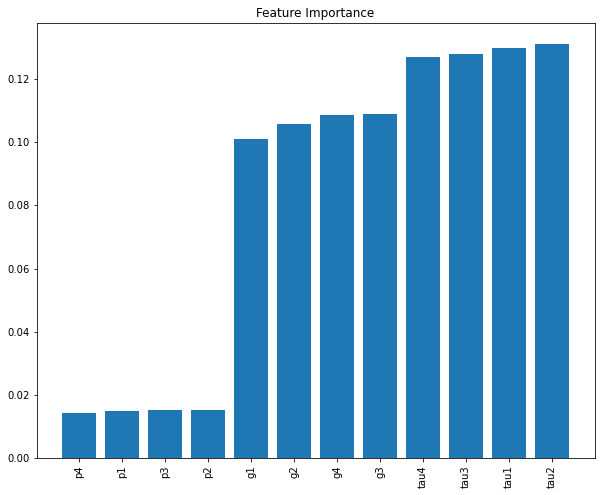

In [23]:
feature_importances = new_model.feature_importances_
indices = np.argsort(feature_importances)
names = [x_train.columns[i] for i in indices]

plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), feature_importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

In [24]:
TP= 355
TN= 120
FP= 1480
FN= 45

In [27]:
Precision= TP/(TP+FP)
print(Precision)

0.19346049046321526


In [28]:
Recall= TP/(TP+FN)
print(Recall)

0.8875


In [30]:
F1 = (Precision*Recall)/(Precision+Recall)
F1_score= F1*2
print(F1_score)

0.3176733780760626


In [36]:
# computing for option A
print(f'Recall option A is {820 / (820 + 180)}')
print(f'False Positive Rate option A is {40 / (40 + 980)}')
print(f'Costs option A is {5 * 40 + 360} \n')

# computing for option B
print(f'Recall option B is {700 / (700 + 200)}')
print(f'False Positive Rate option B is {round(300 / (300 + 800), 2)}')
print(f'Costs option B is {5 * 300 + 200} \n')

# computing for option C
print(f'Recall option C is {900/ (900 + 100)}')
print(f'False Positive Rate option C is {10 / (10 + 990)}')
print(f'Costs option C is {5 * 10 + 100} \n')

# computing for option D
print(f'Recall option D is {780 / (780 + 220)}')
print(f'False Positive Rate option D is {90 / (90 + 910)}')
print(f'Costs option D is {5 * 90 + 220}\n')


Recall option A is 0.82
False Positive Rate option A is 0.0392156862745098
Costs option A is 560 

Recall option B is 0.7777777777777778
False Positive Rate option B is 0.27
Costs option B is 1700 

Recall option C is 0.9
False Positive Rate option C is 0.01
Costs option C is 150 

Recall option D is 0.78
False Positive Rate option D is 0.09
Costs option D is 670

